In [1]:
import time
import os
from os import listdir
from os.path import join, isfile
import matplotlib.pyplot as plt


import numpy as np
import numpy.matlib
import pandas as pd
import pyedflib
from scipy.signal import find_peaks_cwt, welch
from scipy.signal import decimate
from datetime import timedelta
from mne.filter import filter_data

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict, cross_val_score, KFold
from sklearn.metrics import roc_auc_score, roc_curve

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import glob

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, hilbert, chirp
from scipy import signal
from scipy.fft import fft, ifft
import torch

(0.0, 860.0)

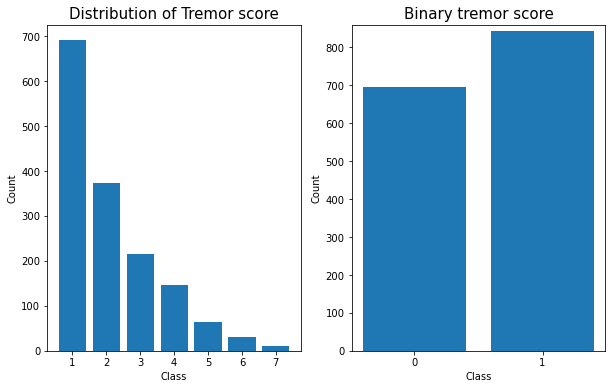

In [2]:
EMA_data = pd.read_csv('data/EMA_data.csv')
EMA_data['tremorBinary']=[1 if x > 1 else 0 for x in EMA_data['tremor'] ]

from matplotlib.ticker import MaxNLocator

fig=plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
plt.bar(EMA_data['tremor'].value_counts().sort_index().index, EMA_data['tremor'].value_counts().sort_index().values)
plt.title('Distribution of Tremor score',fontsize = 15)
plt.ylabel('Count',fontsize = 10)
plt.xlabel('Class',fontsize = 10)


plt.subplot(1,2,2)

plt.bar(EMA_data['tremorBinary'].value_counts()
        .sort_index().index, EMA_data['tremorBinary']
        .value_counts().sort_index().values)
plt.title('Binary tremor score', fontsize = 15)
plt.ylabel('Count',fontsize = 10)
plt.xlabel('Class',fontsize = 10)
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_ylim([0, 860])
#fig.savefig('/Users/jiayihan/OneDrive - Danmarks Tekniske Universitet/Thesis/Thesis_figures/binary.png')


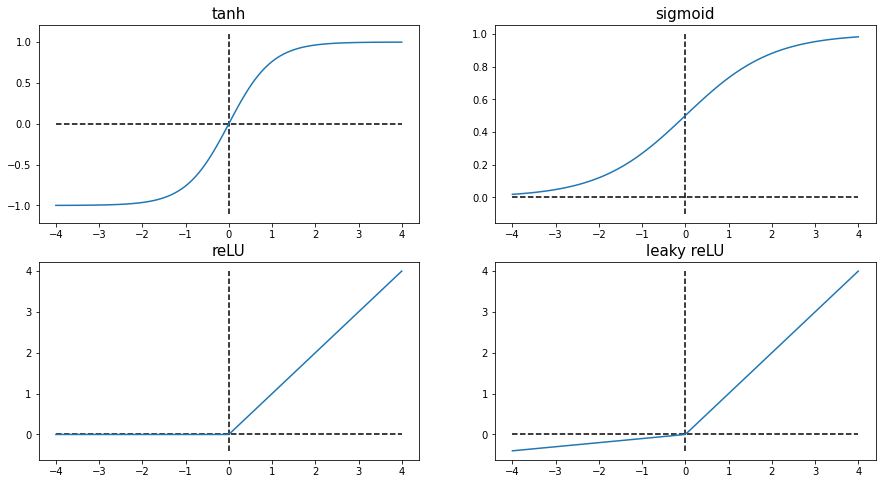

In [3]:
import math

def sigmoid(x):
    return 1 / (1 + np.exp(-x))
x = np.linspace(-4,4,100)


fig = plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
plt.plot(x,np.tanh(x))
plt.hlines(0,-4,4,colors='k', linestyles='dashed')
plt.vlines(0,-1.1,1.1,colors='k', linestyles='dashed')



plt.title('tanh', fontsize = 15)


plt.subplot(2,2,2)
plt.plot(x,sigmoid(x))
plt.hlines(0,-4,4,colors='k', linestyles='dashed')
plt.vlines(0,-0.1,1,colors='k', linestyles='dashed')
plt.title('sigmoid', fontsize = 15)


plt.subplot(2,2,3)
y = np.maximum(0, x)

plt.plot(x,y)
plt.hlines(0,-4,4,colors='k', linestyles='dashed')
plt.vlines(0,-0.4,4,colors='k', linestyles='dashed')
plt.title('reLU', fontsize = 15)

plt.subplot(2,2,4)
yy = np.maximum(0.1*x, x)

plt.plot(x,yy)
plt.hlines(0,-4,4,colors='k', linestyles='dashed')
plt.vlines(0,-0.4,4,colors='k', linestyles='dashed')
plt.title('leaky reLU', fontsize = 15)
fig.savefig('/Users/jiayihan/OneDrive - Danmarks Tekniske Universitet/Thesis/Thesis_figures/activations.png')



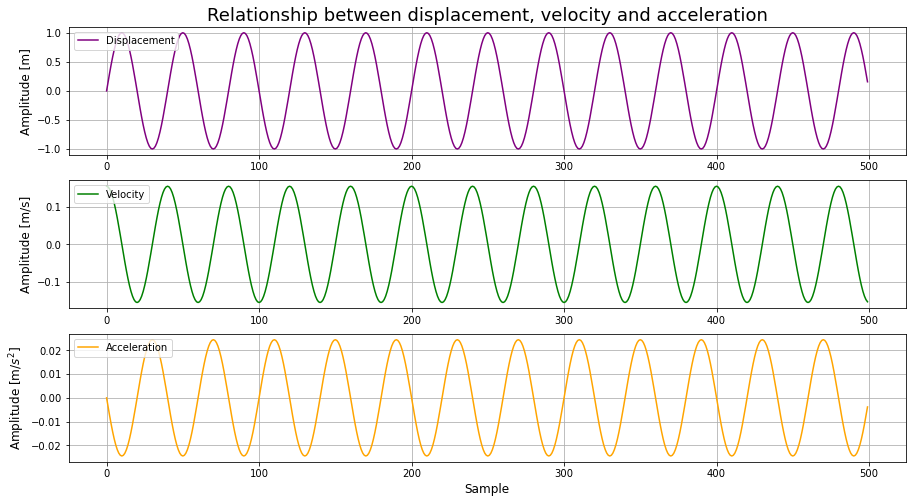

In [42]:
# acceleration 

import matplotlib.pyplot as plt
import numpy as np


Fs = 200
f = 5
sample = 500

x = np.arange(sample)

fig = plt.figure(figsize=(15,8))
# importing the library
import matplotlib.pyplot as plt
from scipy.misc import derivative
import numpy as np
  
# defining the function
def function(x):
    return np.sin(2 * np.pi * f * x / Fs)
  
# calculating its derivative
def deriv(x):
    return derivative(function, x)

# calculating its derivative
def dderiv(x):
    return derivative(deriv, x)


plt.subplot(3,1,1)
# plotting the function
plt.plot(x, function(x), color='purple', label='Displacement')
plt.legend(loc='upper left')
plt.ylabel('Amplitude [m]', fontsize=12)
plt.grid(True)
plt.title('Relationship between displacement, velocity and acceleration', fontsize=18)
plt.subplot(3,1,2)
# plotting its derivative
plt.plot(x, deriv(x), color='green', label='Velocity')
plt.legend(loc='upper left')
plt.ylabel('Amplitude [m/s]', fontsize=12)
plt.grid(True)

plt.subplot(3,1,3)
# plotting its derivative
plt.plot(x, dderiv(x), color='orange', label='Acceleration')
plt.legend(loc='upper left')
plt.grid(True)

plt.xlabel('Sample',fontsize=12)
plt.ylabel('Amplitude [m/$s^2$]', fontsize=12)
fig.savefig('/Users/jiayihan/OneDrive - Danmarks Tekniske Universitet/Thesis/Thesis_figures/relationAcc.png')



## Bag data viz 
Plotting / finding the mean and standard deviation of accelerometer and gyroscope values across the bagdata (before normalization) 



In [6]:
labels = pd.read_csv('data/bagData/Labels_all.csv')

means_acc = []
stds_acc = []
means_gyr = []
stds_gyr = []

for idx in range(len(labels)):
    filename = labels.iloc[idx]['filenames']
    data = np.load('data/bagData/'+filename).astype(np.float64)
    means_acc.append(np.mean(data[:,:,[0,1,2,6,7,8]]))
    means_gyr.append(np.mean(data[:,:,[3,4,5,9,10,11]]))
    stds_acc.append(np.std(data[:,:,[0,1,2,6,7,8]]))
    stds_gyr.append(np.std(data[:,:,[3,4,5,9,10,11]]))

In [15]:
print('Accelerometer')
print(np.mean(means_acc))
print(np.mean(stds_acc))
print('Gyro')
print(np.mean(means_gyr))
print(np.mean(stds_gyr))

Accelerometer
6.897752788538393e-06
0.08269768083228331
Gyro
0.001437785589670397
19.863137739682127
